<a href="https://colab.research.google.com/github/JosenildoJunior/Lh_desafio/blob/main/Desafio_indicium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio**

Você foi contratado por um estúdio de Hollywood chamado PProductions, e agora deve fazer uma análise em cima de um banco de dados cinematográfico para orientar qual tipo de filme deve ser o próximo a ser desenvolvido. Lembre-se que há muito dinheiro envolvido, então a análise deve ser muito detalhada e levar em consideração o máximo de fatores possíveis (a introdução de dados externos é permitida - e encorajada).


# **Entregas**

- 1. Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses relacionadas. Seja criativo!

- 2. Responda também às seguintes perguntas:

  - Qual filme você recomendaria para uma pessoa que você não conhece?
  - Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?
  - Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?

- 3. Explique como você faria a previsão da nota do imdb a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

- 4.Supondo um filme com as seguintes características:

  {'Series_Title': 'The Shawshank Redemption',
  'Released_Year': '1994',
  'Certificate': 'A',
  'Runtime': '142 min',
  'Genre': 'Drama',
  'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
  'Meta_score': 80.0,
  'Director': 'Frank Darabont',
  'Star1': 'Tim Robbins',
  'Star2': 'Morgan Freeman',
  'Star3': 'Bob Gunton',
  'Star4': 'William Sadler',
  'No_of_Votes': 2343110,
  'Gross': '28,341,469'}


Qual seria a nota do IMDB?

- 5. Salve o modelo desenvolvido no formato .pkl.
- 6. A entrega deve ser feita através de um repositório de código público que contenha:

  - README explicando como instalar e executar o projeto
  - Arquivo de requisitos com todos os pacotes utilizados e suas versões
  - Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.
  - Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook).
  - Arquivo .pkl conforme passo 5 acima.
  Todos os códigos produzidos devem seguir as boas práticas de codificação.


# **Ajustes iniciais**

Antes de tudo, vamos importar as bibliotecas que serão necessárias para realizarmos nossas análises.

In [1]:
# Manipulação de dados
import pandas as pd

# Algébra linear
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Funções estatísticas
import statistics
from scipy import stats

# Importando o skew
from scipy.stats import skew

Agora vamos importar nossos dados.

In [2]:
# Acesso ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importando o dataset
df = pd.read_csv('/content/drive/MyDrive/Dados/desafio_indicium_imdb.csv')

# Observando os primeiro registros
df.head()

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Neste primeiro contato, podemos notar que nossa base de dados possui diversos tipos de dados, desde numéricos até categóricos. Dito isso, vamos observar as dimensões deste nosso dataset.

In [4]:
# Dimensão do nosso DF
df.shape

(999, 16)

Temos um total de 999 linhas e 16 colunas. Sabendo disso, vamos dar uma olhada no nosso dicionário de dados.

Agora vamos observar o dicionário dos dados.

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


Agora que temos o dicionário para nos auxiliar, vamos observar o tipo de dado presente em cada uma das nossas colunas.

In [5]:
# Observando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     999 non-null    int64  
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    object 
 3   Certificate    898 non-null    object 
 4   Runtime        999 non-null    object 
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     842 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          830 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.0+ KB


Agora podemos notar que a variável 'Unnamed' é do tipo inteiro. Essa variável normalmente aparece em arquivos do tipo CSV; ela é algo como um índice sem nome. Dito isso vamos excluir ela do nosso df

In [6]:
# Excluindo a coluna 'Unnamed:0'
df = df.drop('Unnamed: 0', axis = 1)

Agora, vamos seguir para as próximas e dividir nossos dados numéricos dos nossos dados categóricos.

**Dados numéricos**

- A variável 'IMDB_Rating' é uma variável numérica do tipo float.
- A variável 'Meta_score' também é numérica do tipo float.
- A variável 'No_of_Votes' é do tipo numérica e int.

**Dados categóricos**

Já os dados categóricos são compostos pelas seguintes variáveis:

- 'Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'Gross'.


Aqui podemos notar que alguns dados categóricos deveriam ser do tipo numérico. Um exemplo é a variável 'Gross', que é referente ao faturamento e deveria ser do tipo float. Algo semelhante acontece com a variável 'Released_Year', que deveria ser do tipo numérico ou do tipo date. Também podemos observar a variável 'Runtime', que representa o tempo do filme em minutos e está como categórica.

É possível realizar algumas conversões necessárias para que possamos trabalhar melhor com esses dados.


Dito isso antes de partirmos para os proximos passos vamos realizar essas conversões visando conseguirmos analisar os dados de forma mais assertiva

Ajustando os dados presentes na coluna **'Gross'**

In [7]:
# Removendo as vírgulas, convertendo para numérico e substituindo valores inválidos por NaN
df['Gross'] = df['Gross'].str.replace(',', '')
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Convertendo para float
df['Gross'] = df['Gross'].astype(float)

# Formatando a coluna 'Gross' para exibição
df['Gross_formatted'] = df['Gross'].apply(lambda x: f"{x:,.0f}" if pd.notnull(x) else 'NaN')

Apos essas operações nossos dados na coluna 'Gross_formatted' que criamos ja devem estar no formato float, dito isso vamos ajustar o restante das nossas variaveis

Ajustando os dados rpesentes na coluna **'Realeased_Year'**

In [8]:
# Convertendo as datas
df['Released_Year'] = pd.to_datetime(df['Released_Year'], format='%Y', errors='coerce')
df['Released_Year'] = df['Released_Year'].dt.year

Dessa forma nossos dados na coluna 'Realeased_Year' assumem o tipo float

Ajustando os dados presentes na coluna **'Runtime'**

In [9]:
# Removendo a unidade de tempo e transformando para inteiro
df['Runtime/min'] = df['Runtime'].str.replace(' min', '').astype(float)

# Excluindo a coluna Runtime
df.drop('Runtime', axis = 1)

,Series_Title,Released_Year,Certificate,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Gross_formatted,Runtime/min
0,The Godfather,1972.0,A,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0,"134,966,411",175.0
1,The Dark Knight,2008.0,UA,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0,"534,858,444",152.0
2,The Godfather: Part II,1974.0,A,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0,"57,300,000",202.0
3,12 Angry Men,1957.0,U,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0,"4,360,000",96.0
4,The Lord of the Rings: The Return of the King,2003.0,U,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0,"377,845,905",201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,Breakfast at Tiffany's,1961.0,A,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN,NaN,115.0
995,Giant,1956.0,G,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN,NaN,201.0
996,From Here to Eternity,1953.0,Passed,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,30500000.0,"30,500,000",118.0
997,Lifeboat,1944.0,NaN,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN,NaN,97.0


Apos essa mudança os dados na coluna 'Runtime' assumem o tipo float

Dessa forma acabamos de converter os valores presentes na coluna 'gross' para valores do tipo float, já na coluna 'Released_Year' estamos convertendo os dados para o tipo float, enquanto a coluna runtime retiramos a palavra 'min' deixamos um espaço em branco no lugar e transformamos o restante do valor que sobrou em valores do tipo int

Vamos confirmar as mudanãs observando algumas informações dos nossos dados

In [10]:
# Observando algumas informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Series_Title     999 non-null    object 
 1   Released_Year    998 non-null    float64
 2   Certificate      898 non-null    object 
 3   Runtime          999 non-null    object 
 4   Genre            999 non-null    object 
 5   IMDB_Rating      999 non-null    float64
 6   Overview         999 non-null    object 
 7   Meta_score       842 non-null    float64
 8   Director         999 non-null    object 
 9   Star1            999 non-null    object 
 10  Star2            999 non-null    object 
 11  Star3            999 non-null    object 
 12  Star4            999 non-null    object 
 13  No_of_Votes      999 non-null    int64  
 14  Gross            830 non-null    float64
 15  Gross_formatted  999 non-null    object 
 16  Runtime/min      999 non-null    float64
dtypes: float64(5), i

Aqui podemos confirmar que nossas mudanças foram aplicadas com exito, dito isso vamos avançar com a nossa analise

# **Análise inicial nos dados**

Nessa etapa, vamos estabelecer um primeiro contato com os nossos dados. Para começar, vamos responder algumas perguntas:



- Quantos dados temos? (Número de linhas e colunas)

- Quais são as colunas numéricas?

- Existem dados nulos nesta base de dados? O que será que esses dados indicam ?

- Qual é a média, mediana, 25º percentil, 75º percentil, mínimo e máximo de cada uma das colunas numéricas?

Como vimos anteriormente nosso df possui 999 linhas e 16 colunas

Agora vamos checar quantas colunas numericas restaram após aplicarmos as devidas transformações

In [11]:
# Observando algumas informações
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Series_Title     999 non-null    object 
 1   Released_Year    998 non-null    float64
 2   Certificate      898 non-null    object 
 3   Runtime          999 non-null    object 
 4   Genre            999 non-null    object 
 5   IMDB_Rating      999 non-null    float64
 6   Overview         999 non-null    object 
 7   Meta_score       842 non-null    float64
 8   Director         999 non-null    object 
 9   Star1            999 non-null    object 
 10  Star2            999 non-null    object 
 11  Star3            999 non-null    object 
 12  Star4            999 non-null    object 
 13  No_of_Votes      999 non-null    int64  
 14  Gross            830 non-null    float64
 15  Gross_formatted  999 non-null    object 
 16  Runtime/min      999 non-null    float64
dtypes: float64(5), i

**Dados numéricos**

- As variáveis 'IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime/min'.

**Dados do tipo data**

- A variavel 'Released_Year'

**Dados categóricos**

- 'Series_Title', 'Certificate', 'Genre', 'Overview', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'.

Agora vamos observar quantos valores ausentes existem em nossa base.

In [12]:
# Observando os valores ausentes
def percent_ausentes(df):
    p_faltantes = df.isnull().mean()
    valores_faltantes = pd.DataFrame({'Variavéis': df.columns,
                                           '% de ausentes': p_faltantes}
                                      ).reset_index(drop = True)

    return valores_faltantes.sort_values(by = ['% de ausentes'], ascending = False)

# Exibindo a quantidade de valores ausentes
percent_ausentes(df)

,Variavéis,% de ausentes
14,Gross,0.169169
7,Meta_score,0.157157
2,Certificate,0.101101
1,Released_Year,0.001001
0,Series_Title,0.000000
10,Star2,0.000000
15,Gross_formatted,0.000000
13,No_of_Votes,0.000000
12,Star4,0.000000
11,Star3,0.000000


A variavel 'Gross' apresenta cerca de 16,9% de valores ausentes também podemos observar cerca de 15,7% dados ausentes na variavel 'Meta_score', 10,1% em 'Certificate' e 1% em 'Released_Year'. Levando em consideração a quantidade dos nosso dados muito provavelmente teremos 169 valores ausentes em 'Gross', 157 em 'Meta_score', 101 em 'Certificate' e 1 em 'Released_Year'

Vamos ver se essas suspeitas realmente estão corretas

In [13]:
# Observando a soma dos valores ausentes
df.isnull().sum().sort_values(ascending = False)

Gross              169
Meta_score         157
Certificate        101
Released_Year        1
Series_Title         0
Star2                0
Gross_formatted      0
No_of_Votes          0
Star4                0
Star3                0
Director             0
Star1                0
Overview             0
IMDB_Rating          0
Genre                0
Runtime              0
Runtime/min          0
dtype: int64

Confirmarmos nossas suspetias, agora podemos seguir para a observação do resumo estatistico dos nossos dados

In [14]:
# Resumo estatístico dos dados
desc = df.describe()

# Formatar números para exibir menos casas decimais
pd.options.display.float_format = '{:.3f}'.format

# Exibindo as estatísticas descritivas formatadas
desc

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime/min
count,998.000,999.000,842.000,999.000,830.000,999.000
mean,1991.214,7.948,77.969,271621.422,68082574.105,122.872
std,23.309,0.272,12.383,320912.621,109807553.386,28.101
min,1920.000,7.600,28.000,25088.000,1305.000,45.000
25%,1976.000,7.700,70.000,55471.500,3245338.500,103.000
50%,1999.000,7.900,79.000,138356.000,23457439.500,119.000
75%,2009.000,8.100,87.000,373167.500,80876340.250,137.000
max,2020.000,9.200,100.000,2303232.000,936662225.000,321.000


Observando os os dados em 'Realeased_Year' que é referente ao ano de lançamento dos filmes

- Podemos observar que o filme mais antigo em nossa base é de 1920, podemos observar que 25% dos filmes foram lançados antes de 1976, sendo que metade dos filmes foram lançados antes de 1999 consequentemente a outra metade foi lançado após 1999, apenas 25% filems foram lançados depois de 2009. Aqui a média esta um pouco distante da mediana, provavelmente a distribuição apresenta alguma assimetria

Agora vamos observar a coluna 'IMDB_Rating'

- Temos uma nota média de 7,9 sendo que a menor nota é 7,6 25% dos nossos filmes apresentam uma nota menor que a media, 50% dos nossos filmes apresentam notas abaixo ou igual a média temos que 25% dos filems apresetam uma nota maior que 8,1. A maior nota de um filme foi de 9,2. Importante frisarmos que temos uma media bem proximo a uma mediana o que pode indicar uma distribuição bem proxima de uma normal, podemos fortalecer nossas suspeitas quando observamos o desvio padrão que é e 0,27 é um desvio bem baixo indicando que os dados variam pouco em relação a média

Observando a coluna 'Meta_score'

- Podemos observar que A media é de 77 enquanto a menor nota é de 28, 25% dos nossos filmes tem notas iguais ou inferior a 70 sendo que a metade dos filmes tem notas iguais ou inferior a 75 e 25% apresentam nota superior a 87, é possivel observar que temos regfistros de filmes com a nota maxima que é de 100. Não temos um desvio padrão tão alto indicando assim que os dados se distanciam mas não tanto da média

Observando a coluna 'No_of_Votes'

- Temos uma media de numero de votos de 271 mil enquanto o menor numero de votos é de 25 mil, 25% dos filmes apresentam um numero de votos igual ou inferior a 55 mil, sendo que metade dos nossos filmes apresentam um numero de votos igual ou inferior 138 mil 25% dos filmes apresentam um numero de notas igual ou superior a 373 mil votos enquanto o maior numero de votos é de 2 milhões e 300 mil votos, temos um desvio padrão de 320 mil e julgando pela distancia entre a media e a mediana provavelmente esses dados estão bem dispersos

Coluna 'Gross'

- O faturamento medio dos filmes é de 68 milhões, sendo que o menor faturamento registrado em nossa base é de 1 milhão e 300 mil, 25% dos filmes apresentam um faturamento igual ou inferior a 3 milhões, sendo que metade dos filmes faturam um valor igual ou inferior a 23 milhões enquanto 25% dos nossos filmes que mais faturam apresentam um faturamento igual ou superior a 80 milhões o filme com maior faturamento em nossa base é de 936 milhões, temos um desvio padrão bem alto de 100 milhões e a julgar também pela diferença entre a media e mediana podemos concluir que esses dados estão bem dispersos e sua distribuição muito provavelmente não esta proxima de uma normal

# **Analise univariada (variaveis numericas)**

Nas etapas anteriores realizamos algumas analises iniciais para irmos nos familiarizando melhor com os nossoss dados agora vamos realizar uma analise mais indivual dos nossos dados dito isso nossos objetivos serão:

- Realizar uma análise mais aprofundada das nossas variáveis de interesse.

- Criar uma visualização mais agradável.

In [15]:
df.describe()

,Released_Year,IMDB_Rating,Meta_score,No_of_Votes,Gross,Runtime/min
count,998.000,999.000,842.000,999.000,830.000,999.000
mean,1991.214,7.948,77.969,271621.422,68082574.105,122.872
std,23.309,0.272,12.383,320912.621,109807553.386,28.101
min,1920.000,7.600,28.000,25088.000,1305.000,45.000
25%,1976.000,7.700,70.000,55471.500,3245338.500,103.000
50%,1999.000,7.900,79.000,138356.000,23457439.500,119.000
75%,2009.000,8.100,87.000,373167.500,80876340.250,137.000
max,2020.000,9.200,100.000,2303232.000,936662225.000,321.000


### **Released_Year**

Começaremos com a varaivel 'Released_Year'

In [ ]:
# Resumo estátistico
df['Released_Year'].describe()

count    998.000
mean    1991.214
std       23.309
min     1920.000
25%     1976.000
50%     1999.000
75%     2009.000
max     2020.000
Name: Released_Year, dtype: float64

**Pontos importantes:**

- Como já vimos anteriormente o filme mais antigo em nossa base é de 1920 enquanto o mais recente é de 2020, metade dos nossos dados são de 1999 ou mais antigo.

- Ao observarmos o grafico podemos notar que os lançamentos apresentam picos em determinados anos porém eles apresentam uma crescente com o passar dos anos, no entanto em 2020 eles apresentam uma queda brusca, muito provavelmente pelo cenario em que o mundo se encontrava já que estamos passando por uma pandemia global







**Insights Potenciais**

*Univariadas*
- Ciclos de Popularidade: Identificar períodos de maior ou menor atividade na produção cinematográfica.

*Bivariadas*
- Tendências de Gênero: Observar se certos gêneros se tornaram mais ou menos populares ao longo do tempo.
- Impacto da Data de Lançamento: Verificar se a data de lançamento influencia a receita de bilheteria ou a classificação etária dos filmes.

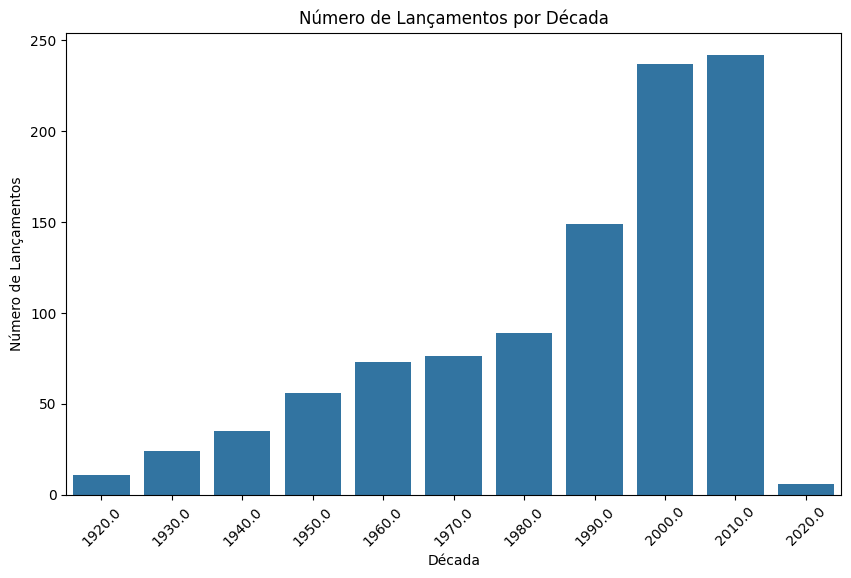

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supondo que df['Released_Year'] já foi convertida para o tipo int

# Agrupando por décadas
df['Decade'] = (df['Released_Year'] // 10) * 10

# Contando o número de lançamentos por década
decade_counts = df['Decade'].value_counts().sort_index()

# Plotando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=decade_counts.index, y=decade_counts.values)
plt.xlabel('Década')
plt.ylabel('Número de Lançamentos')
plt.title('Número de Lançamentos por Década')
plt.xticks(rotation=45)
plt.show()

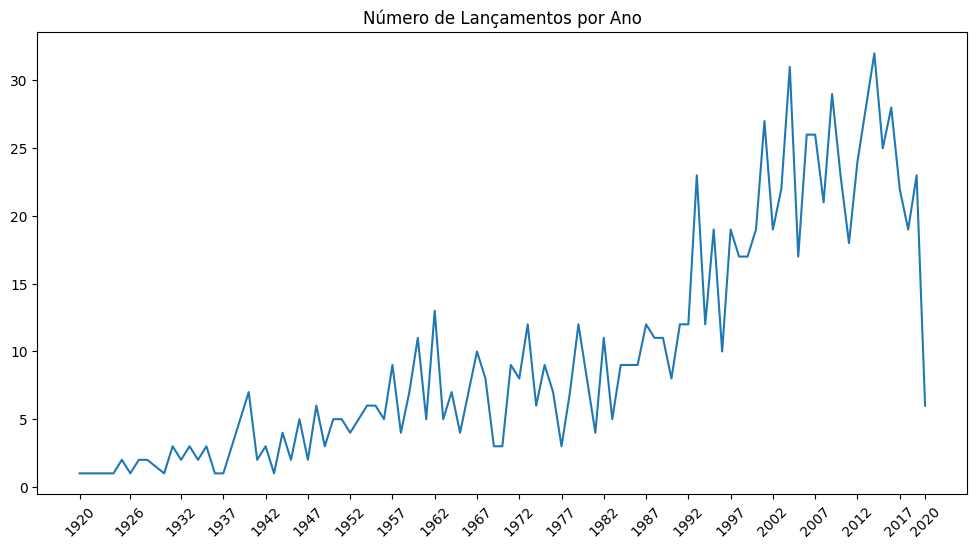

In [ ]:
# Contando o número de lançamentos por ano
year_counts = df['Released_Year'].value_counts().sort_index()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 6))
sns.lineplot(x=year_counts.index, y=year_counts.values)
plt.xlabel('')
plt.title('Número de Lançamentos por Ano')

# Criando uma lista de rótulos para o eixo x a cada 5 anos e incluindo o último ano
ticks = list(year_counts.index[::5])
if year_counts.index[-1] not in ticks:
    ticks.append(year_counts.index[-1])

plt.xticks(ticks=ticks, rotation=45)
plt.show()

**Conclusões**

- A análise dos lançamentos de filmes entre 1920 e 2020 revela um crescimento consistente na produção cinematográfica ao longo do século, com um aumento notável nas décadas de 2000 e 2010, que registraram os maiores números de lançamentos. No entanto, em 2020, observamos uma queda abrupta no número de filmes lançados, provavelmente devido à pandemia global de COVID-19, que impactou drasticamente a indústria cinematográfica.

### **IMDB**

Vamos observar um pouco mais afundo as notas no IMDB

In [ ]:
# Resumo estátistico
df['IMDB_Rating'].describe()

count    999.000000
mean       7.947948
std        0.272290
min        7.600000
25%        7.700000
50%        7.900000
75%        8.100000
max        9.200000
Name: IMDB_Rating, dtype: float64

**Pontos importantes:**

- A média das notas dos filmes é aproximadamente 7,95, com a menor nota sendo 7,6 e a maior nota sendo 9,2. A mediana das notas é 7,9, o que significa que metade dos filmes tem uma nota menor ou igual a 7,9. Além disso, 75% dos filmes possuem notas menores ou iguais a 8,1.

- O desvio padrão é relativamente baixo, apenas 0,27, indicando que a maioria das notas está próxima da média.

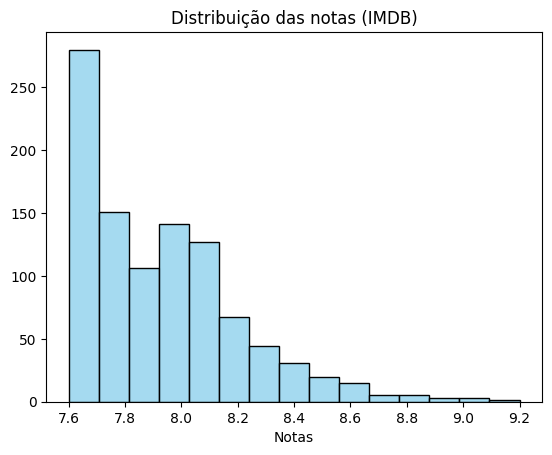

In [ ]:
# Criando o gráfico
sns.histplot(df['IMDB_Rating'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição das notas (IMDB)')
plt.xlabel('Notas')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Embora as notas apresentem um desvio padrão relativamente baixo, indicando que a maior parte dos dados está próxima da média, a média é bem próxima da mediana. No entanto, podemos observar que os dados apresentam uma assimetria positiva (à direita), indicando que menos filmes têm notas mais altas. Vamos checar o skew dessa coluna.

In [ ]:
# Medindo a simetria da distribuição de dados
df['IMDB_Rating'].skew()

0.9466926905932237

A assimetria positiva (skew = 0,94) indica que a distribuição das notas tem uma cauda mais longa à direita, com menos filmes recebendo notas muito altas.

**Conclusões**

- As notas variam entre 7,6 e 9,2, mostrando uma faixa moderada de variação. A maioria dos filmes tem notas próximas à média, como indicado pelo desvio padrão relativamente baixo de 0,27.

- Apesar de a maioria das notas dos filmes se concentrar em torno da média de 7,94, a distribuição apresenta uma assimetria positiva. O desvio padrão baixo reforça a ideia de que as notas são relativamente consistentes, com poucas exceções extremas.

- A assimetria positiva, refletida por um coeficiente de skew de 0,94, indica que há menos filmes com notas muito altas, resultando em uma cauda mais longa à direita na distribuição das notas.

### **Meta_score**

Vamos observar de uma forma mais minuciosa a variavel 'Meta_score'

In [ ]:
# Resumo estátistico
df['Meta_score'].describe()

count    842.000000
mean      77.969121
std       12.383257
min       28.000000
25%       70.000000
50%       79.000000
75%       87.000000
max      100.000000
Name: Meta_score, dtype: float64

**Pontos importantes**

- A média dos meta scores é de aproximadamente 77, com o menor valor sendo 28 e o maior sendo 100. Mais da metade dos filmes têm um meta score superior à média de 77.

- O desvio padrão é de 12,38, indicando uma dispersão moderada dos dados em relação à média.

- Os meta scores variam de 28 a 100, mostrando uma ampla variação na avaliação crítica dos filmes.

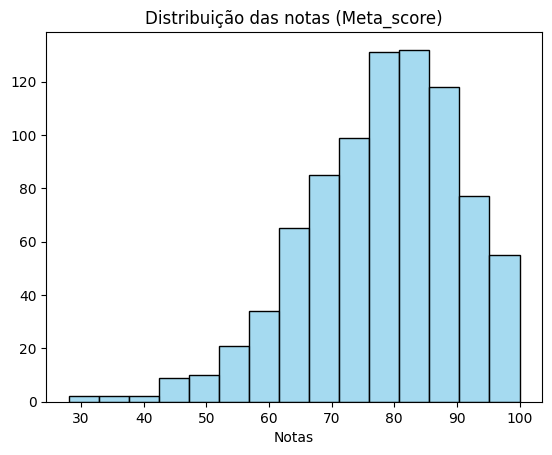

In [ ]:
# Criando o gráfico
sns.histplot(df['Meta_score'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição das notas (Meta_score)')
plt.xlabel('Notas')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Como já suspeitavamos essa variavel realmente apresentou uma assimetria a esquerda indicando assim que essa assimetria é negativa e levando em consideração que a média é de 77, podemos observar que a maior parte dos nosso dados estão acima da média

In [ ]:
# Medindo a simetria da distribuição de dados
df['Meta_score'].skew()

-0.604316230073612

**Conclusões**

- A análise dos meta scores revela que a maioria dos filmes é bem avaliada, com mais da metade recebendo meta scores superiores à média de 77. A dispersão moderada dos dados em relação à média, indicada pelo desvio padrão, reflete uma variedade significativa nas opiniões críticas.

- A assimetria negativa da distribuição, conforme indicado pelo coeficiente de skew, sugere que há mais filmes com avaliações críticas mais altas do que aquelas com avaliações muito baixas, contribuindo para uma cauda mais longa à esquerda na distribuição dos meta scores.

### **No_of_votes**

Iniciando analise na variavel referente ao numero de votos dos filmes

In [ ]:
df['No_of_Votes'].describe()

count       999.000
mean     271621.422
std      320912.621
min       25088.000
25%       55471.500
50%      138356.000
75%      373167.500
max     2303232.000
Name: No_of_Votes, dtype: float64

**Pontos importantes**

- Aqui podemos notar que a média de votos é de 271 mil o filme com menos votos tem 25 mil votos e o filmes mais votado tem 2 milhões de votos indicando assim uma ampla variação no numero de votos

- Temos um desvio padrão de 320 mil, o que pode ser considerado um desvio bem grande em relação a essa variavel muito provavelmente os dados estão bem dispersos em relação a média

- Comparando a media com a mediana notamos mais uma vez a discrepancia que temos entre essas medidas o que confirma as nossas suspetias de que os dados estão bem dispersos

- Quando observamos os quartis podemos notar que a maior parte dos dados estão acima da media


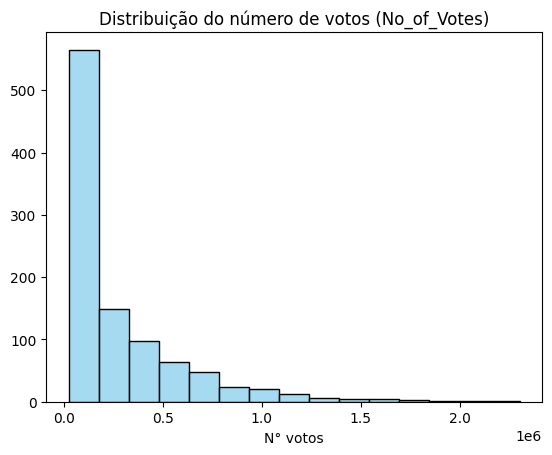

In [35]:
# Criando o gráfico
sns.histplot(df['No_of_Votes'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição do número de votos (No_of_Votes)')
plt.xlabel('N° votos')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

Vamos observar o skew dessa variavel

In [ ]:
skew(df['No_of_Votes'])

2.1910548929956533

Aqui notamos um skew bem forte e positivo indicando uma cauda bem longa a direita dos dados como suspeitamos anteriormente existem muitos filmes com poucos votos e poucos filmes com muito votos

**Conclusões**

- Os números de votos para filmes revelam uma distribuição amplamente variada: a média é de aproximadamente 271 mil votos, com filmes oscilando de 25 mil a 2 milhões de votos. Isso evidencia uma grande dispersão em relação à média, com um desvio padrão de 320 mil votos, indicando que a popularidade dos filmes varia consideravelmente.

- A diferença significativa entre a média e a mediana dos votos confirma a assimetria na distribuição: a média é influenciada por alguns filmes com números muito altos de votos, enquanto a maioria dos filmes está abaixo dessa média. Observando os quartis, nota-se que a maior parte dos filmes está acima da média de votos, sugerindo a presença de filmes muito populares que influenciam positivamente a média.

- O skewness positivo forte de 2,1 indica uma cauda longa à direita na distribuição dos votos, o que significa que há muitos filmes com votos relativamente baixos, enquanto poucos filmes recebem um número muito elevado de votos. Essa assimetria destacada reflete a disparidade na popularidade dos filmes, com alguns alcançando um grande reconhecimento e outros tendo um alcance limitado entre o público.

### **Gross**

Vamos observar o que a nossa variavel de faturamento tem a nos dizer

In [17]:
df['Gross'].describe()

count         830.000
mean     68082574.105
std     109807553.386
min          1305.000
25%       3245338.500
50%      23457439.500
75%      80876340.250
max     936662225.000
Name: Gross, dtype: float64

**Pontos importantes**

- O faturamento médio dos filmes é de aproximadamente 68 milhões, com um desvio padrão significativo de cerca de 109 milhões, indicando uma grande variabilidade nos valores.

- A mediana do faturamento dos filmes é de 23 milhões, o que sugere que a metade dos filmes estão abaixo desse valor, indicando uma possível assimetria positiva na distribuição.

- O filme com o menor faturamento na amostra tem 1305, enquanto o filme com o maior faturamento alcançou 936 milhões, destacando a vasta gama de valores presentes na variável.

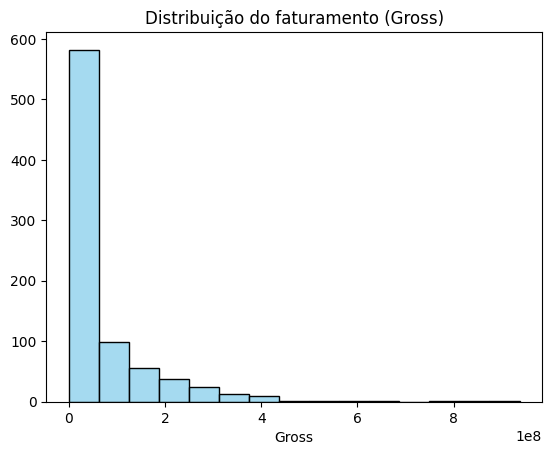

In [32]:
# Criando o gráfico
sns.histplot(df['Gross'], bins = 15, color = 'skyblue')

# Definindo título e labels
plt.title('Distribuição do faturamento (Gross)')
plt.xlabel('Gross')
plt.ylabel('')

# Exibindo o gráfico
plt.show()

A notação científica está sendo usada devido aos altos valores no gráfico, mas isso não compromete a interpretação dos resultados.

A distribuição dos dados parece ser assimétrica positivamente, sugerindo que há mais filmes com faturamentos menores e menos filmes com faturamentos muito altos.

Anteriormente consultamos as variaveis que apresentam valores ausentes e a variavel 'Gross' é uma delas, logo a função skew() não vai nos retornar a simetria dos dados e sim um valor nulo

In [28]:
# Medindo a simetria da distribuição de dados
skew(df['Gross'])

nan

Como suspeitamos anteriormente não conseguiremos utilizar essa função no momento

**Conclusões**

- A analise do faturamento dos filmes revela uma distribuição amplamente dispersa, com uma média significativa de aproximadamente 68 milhões de dólares e um desvio padrão elevado de cerca de 109 milhões de dólares. A mediana de 23 milhões de dólares indica que a metade dos filmes na amostra faturam abaixo desse valor, sugerindo uma predominância de filmes com faturamentos moderados a baixos.

- A presença de valores extremos, desde 1305 até 936 milhões de dólares, ilustra a vasta variedade de faturamentos dentro da indústria cinematográfica.

- A distribuição assimétrica positiva indica que há mais filmes com faturamentos menores do que filmes com faturamentos muito altos, sublinhando a raridade de sucessos de bilheteria extraordinários.

# **Gerando o requirements**

In [ ]:
"""

# Gerar o arquivo de requisitos
!pip freeze > requirements.txt

# Verificar o conteúdo do arquivo de requisitos
!cat requirements.txt

# Baixar o arquivo de requisitos
from google.colab import files
files.download('requirements.txt')

"""

"\n\n# Gerar o arquivo de requisitos\n!pip freeze > requirements.txt\n\n# Verificar o conteúdo do arquivo de requisitos\n!cat requirements.txt\n\n# Baixar o arquivo de requisitos\nfrom google.colab import files\nfiles.download('requirements.txt')\n\n"